In [49]:
import yfinance as yf
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt

In [55]:
import json
def read_json(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

json_file_path = 'PF/experiments2.json' 
data = read_json(json_file_path)

In [3]:
data.keys()

dict_keys(['2YLong_12_ratingCareerOpportunities_mean', 'leadership_12M_sharpe', 'leadership_yearly_holding', 'leadership_24M_holding', '1YLong_career', '2YLong_12_ratingOverall_mean', '2YLong_12_ratingCompensationAndBenefits_mean', '1YLong_Leadership', '1YLongShort_Leaderhsip', 'leadership_12M_std', 'leadership_24M_sharpe', 'leadership_24M_std', '2YLong_12_ratingSeniorLeadership_mean', '1YLong_12_ratingWorkLifeBalance_mean', '1YLong_12_ratingCompensationAndBenefits_mean', '2YLong_CEO', '1YLongShort_12_ratingSeniorLeadership_mean', '2YShort_12_ratingSeniorLeadership_mean', '1YLong_12_ratingCultureAndValues_mean', '2YLong_12_ratingCultureAndValues_mean', '2YLong_12_ratingWorkLifeBalance_mean', '1YLong_12_ratingOverall_mean'])

In [62]:
start_date='2010-01-01'
end_date='2023-12-31'
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [63]:
sp500_data['ret'] = sp500_data['Adj Close'].pct_change()
monthly_ret = ((1+sp500_data).resample('M').prod()-1)['ret']
dt=12
rets = []
for i in range(len(monthly_ret)-dt):
    dp = {
        'startdate': monthly_ret.index[i],
        'enddate': monthly_ret.index[i+dt],
        'ret': (monthly_ret.iloc[i:i+dt]+1).prod(),
        'sharpe': (((monthly_ret.iloc[i:i+dt]+1).prod())-1-0.02)/((monthly_ret.iloc[i:i+dt]).std()*np.sqrt(dt))
    }
    rets.append(dp)

spy_12M = pd.DataFrame(rets)
spy_12M = spy_12M[spy_12M['startdate'].isin(longpf_12M.index)].reset_index()

In [64]:
sp500_data['ret'] = sp500_data['Adj Close'].pct_change()
monthly_ret = ((1+sp500_data).resample('M').prod()-1)['ret']
dt=24
rets = []
for i in range(len(monthly_ret)-dt):
    dp = {
        'startdate': monthly_ret.index[i],
        'enddate': monthly_ret.index[i+dt],
        'ret': (monthly_ret.iloc[i:i+dt]+1).prod(),
        'sharpe': (((monthly_ret.iloc[i:i+dt]+1).prod())-1-0.02)/((monthly_ret.iloc[i:i+dt]).std()*np.sqrt(dt))
    }
    rets.append(dp)

spy_24M = pd.DataFrame(rets)
spy_24M = spy_24M[spy_24M['startdate'].isin(pd.DataFrame(data['2YLong_12_ratingSeniorLeadership_mean'])['startdate'])].reset_index()

In [65]:
def plot_rets_compare_spy(pf, spy, period='24M'):
    df = pd.DataFrame({'PF': pf['ret'].values, 'S&P': spy['ret'].values})
    df.index = spy['startdate'].apply(lambda x: x.date())
    
    categories = df.index
    values1 = df['PF']
    values2 = df['S&P']
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Bar width
    bar_width = 0.35
    
    # X locations for the bars
    x = np.arange(len(categories))
    
    # Create the first set of bars
    bars1 = ax.bar(x - bar_width/2, values1, width=bar_width, label='Portfolio', color='b')
    
    # Create the second set of bars
    bars2 = ax.bar(x + bar_width/2, values2, width=bar_width, label='S&P', color='r')
    
    # Set the x-ticks to the category labels
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    
    # Add labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('yearly ret')
    plt.title(f'{period} Portfolio returns compared to S&P returns of same period')
    
    # Add legends
    ax.legend(loc='upper left')
    
    # Show the plot
    plt.tight_layout()
    plt.xticks(range(0, len(df), int(len(df)/5)))
    plt.show()

def plot_sharpe_compare_spy(pf, spy, period='24M'):
    
    df = pd.DataFrame({'PF': pf['sharpe'].values, 'S&P': spy['sharpe'].values})
    df.index = spy['startdate'].apply(lambda x: x.date())
    
    categories = df.index
    values1 = df['PF']
    values2 = df['S&P']
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Bar width
    bar_width = 0.35
    
    # X locations for the bars
    x = np.arange(len(categories))
    
    # Create the first set of bars
    bars1 = ax.bar(x - bar_width/2, values1, width=bar_width, label='Portfolio', color='b')
    
    # Create the second set of bars
    bars2 = ax.bar(x + bar_width/2, values2, width=bar_width, label='S&P', color='r')
    
    # Set the x-ticks to the category labels
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    
    # Add labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('annualized sharpe')
    plt.title(f'{period} Portfolio sharpe ratio compared to S&P sharpe ratio of same period')
    
    # Add legends
    ax.legend(loc='upper left')
    
    # Show the plot
    plt.tight_layout()
    plt.xticks(range(0, len(df), int(len(df)/5)))
    plt.show()


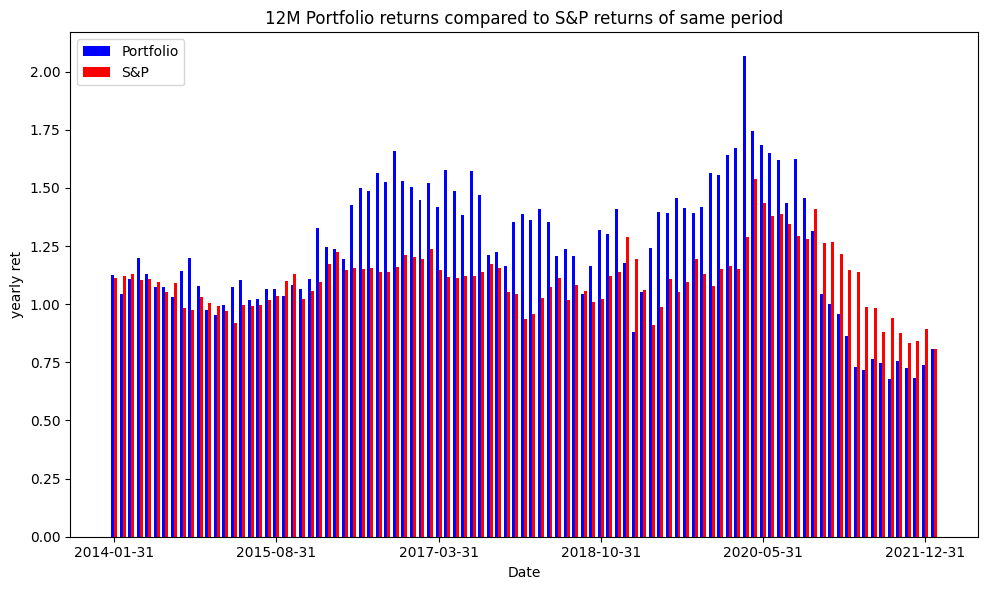

In [75]:
plot_rets_compare_spy(pd.DataFrame(data['1YLong_Leadership']), spy_12M, period='12M')

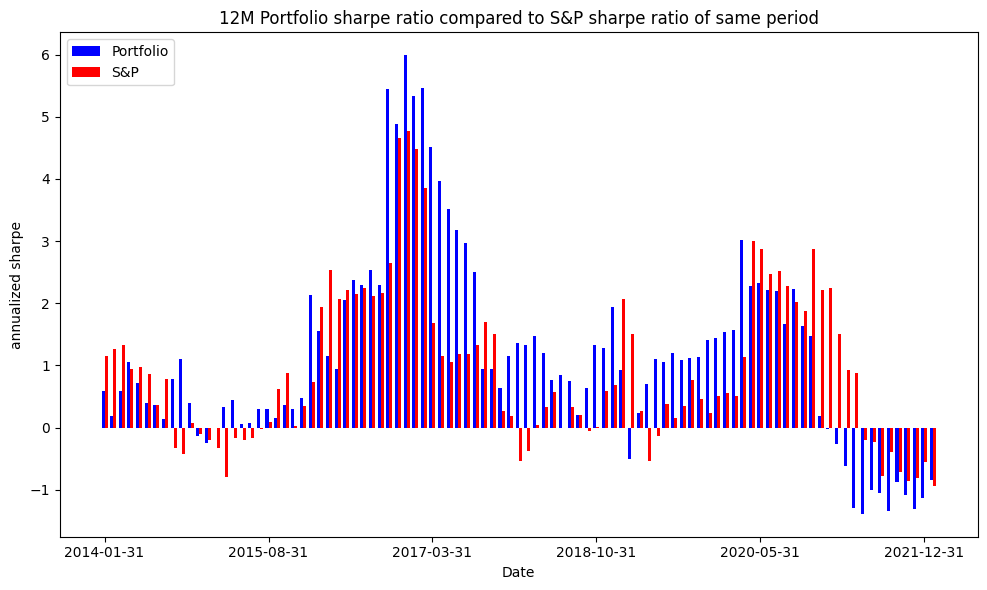

In [74]:
plot_sharpe_compare_spy(pd.DataFrame(data['1YLong_Leadership']), spy_12M, period='12M')

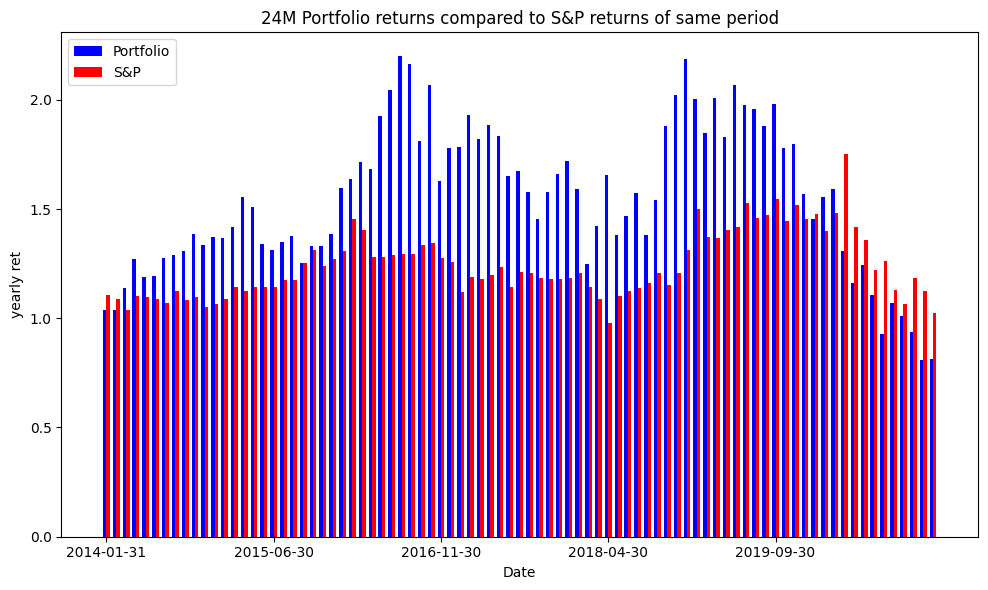

In [70]:
plot_rets_compare_spy(pd.DataFrame(data['2YLong_12_ratingSeniorLeadership_mean']), spy_24M, period='24M')

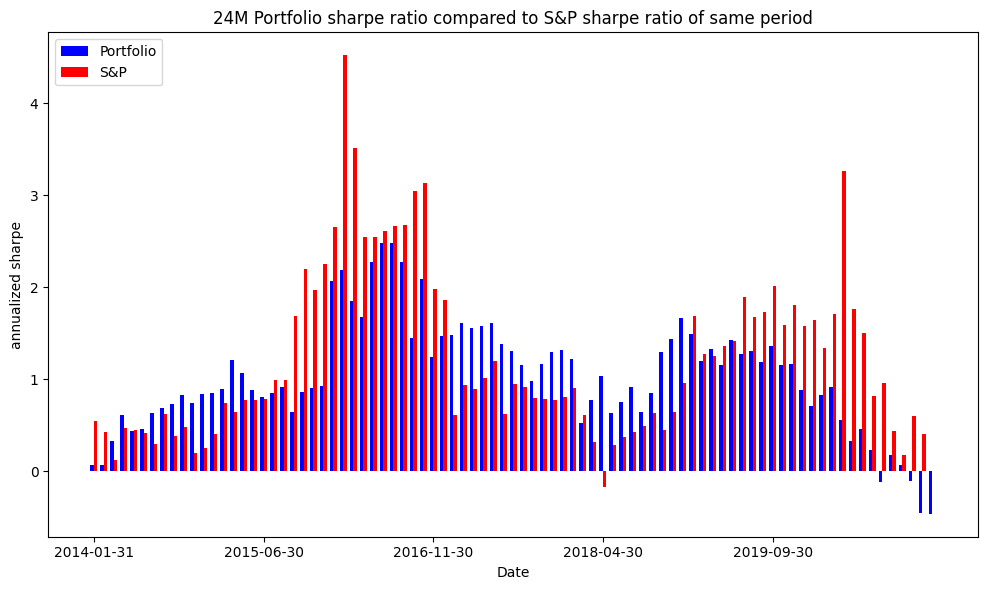

In [76]:
plot_sharpe_compare_spy(pd.DataFrame(data['2YLong_12_ratingSeniorLeadership_mean']), spy_24M, period='24M')

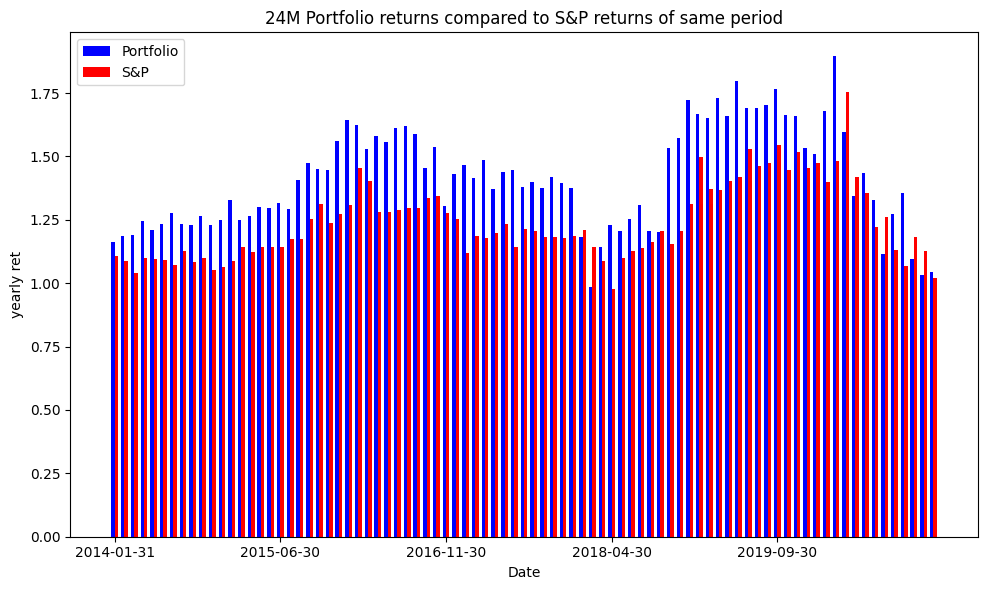

In [77]:
plot_rets_compare_spy(pd.DataFrame(data['2YLong_CEO']), spy_24M, period='24M')

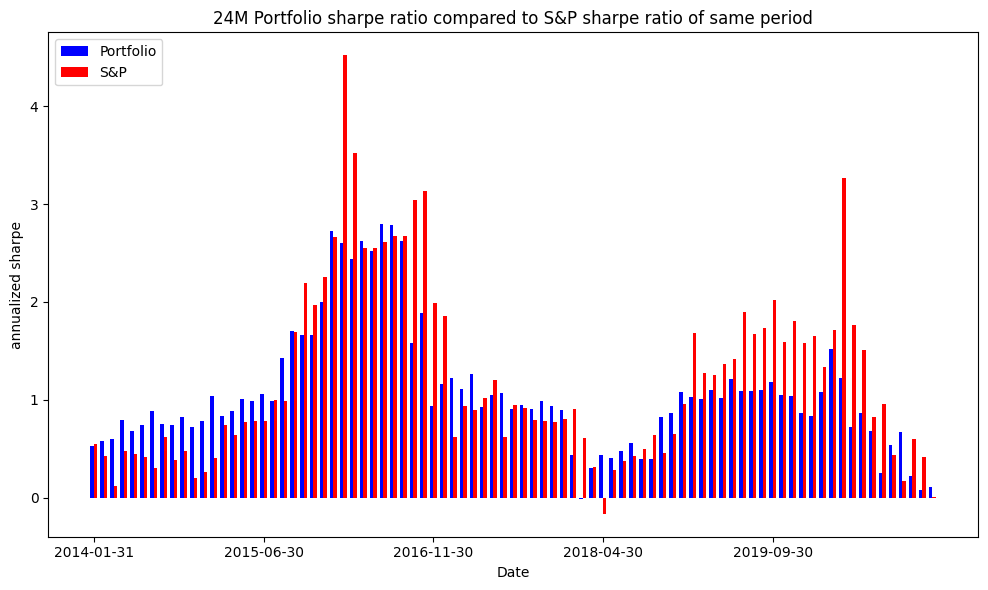

In [78]:
plot_sharpe_compare_spy(pd.DataFrame(data['2YLong_CEO']), spy_24M, period='24M')

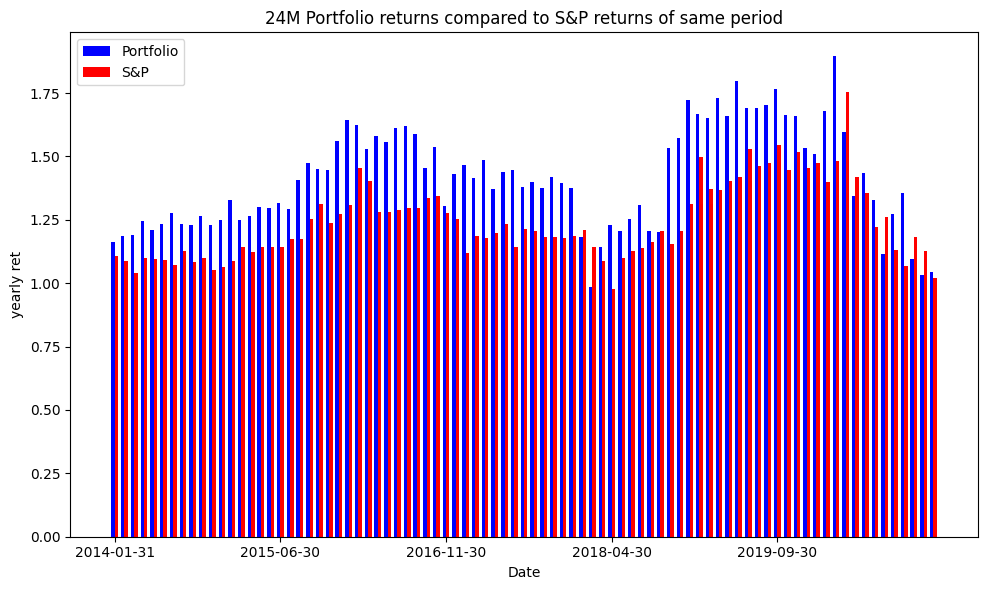

In [79]:
plot_rets_compare_spy(pd.DataFrame(data['2YLong_CEO_Ratio']), spy_24M, period='24M')

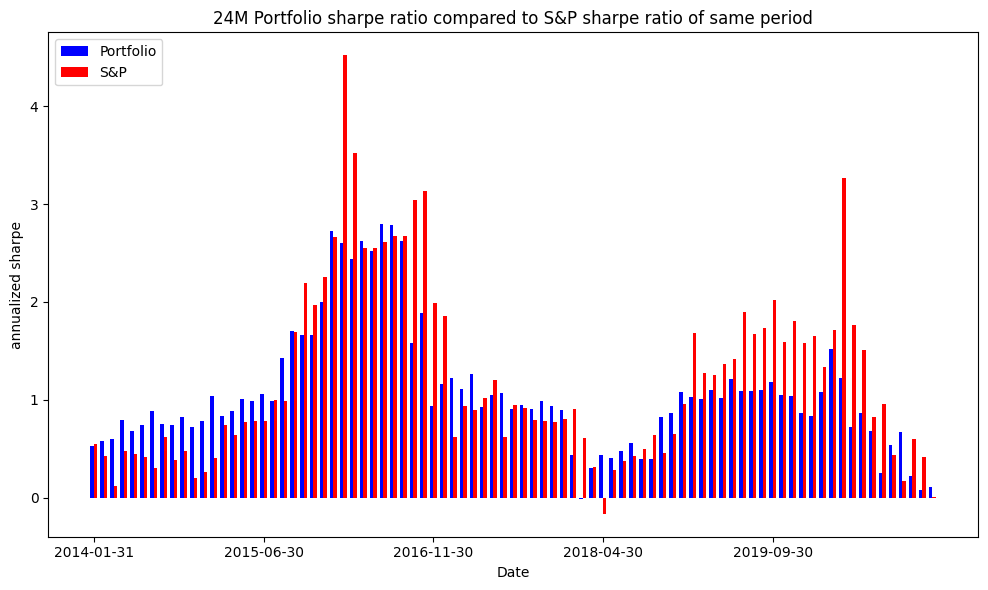

In [80]:
plot_sharpe_compare_spy(pd.DataFrame(data['2YLong_CEO_Ratio']), spy_24M, period='24M')

In [90]:
data.keys()

dict_keys(['2YLong_12_ratingCareerOpportunities_mean', 'leadership_12M_sharpe', 'leadership_yearly_holding', 'leadership_24M_holding', '1YLong_career', '2YLong_12_ratingOverall_mean', '2YLong_12_ratingCompensationAndBenefits_mean', '1YLong_Leadership', '1YLongShort_Leaderhsip', 'leadership_12M_std', 'leadership_24M_sharpe', 'leadership_24M_std', '2YLong_12_ratingSeniorLeadership_mean', '1YLong_12_ratingWorkLifeBalance_mean', '1YLong_12_ratingCompensationAndBenefits_mean', '2YLong_CEO', '1YLongShort_12_ratingSeniorLeadership_mean', '2YShort_12_ratingSeniorLeadership_mean', '1YLong_12_ratingCultureAndValues_mean', '2YLong_12_ratingCultureAndValues_mean', '2YLong_12_ratingWorkLifeBalance_mean', '1YLong_12_ratingOverall_mean', '2YLong_CEO_Ratio'])

<Axes: >

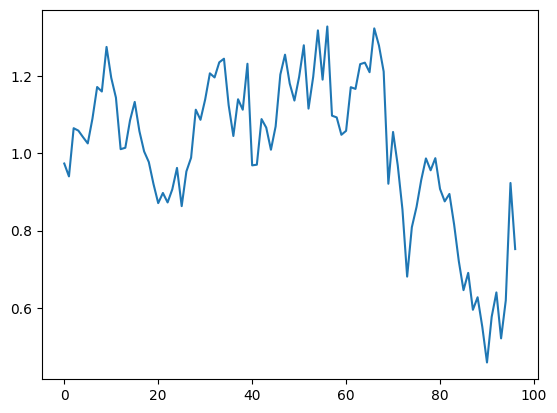

In [89]:
pd.DataFrame(data['1YLongShort_12_ratingSeniorLeadership_mean'])['ret'].plot()